In [3]:
# import sys
# sys.path.insert(1, './wlcstat/')
import numpy as np
# import scipy.special as sp
# import scipy.optimize as opt
import matplotlib.pyplot as plt
import matplotlib.patches
import seaborn as sns
from matplotlib.colors import LogNorm

# sf stability analysis

In [9]:
ID = 9982.64006

looping = "full mark dens comp alt f_bind,"

settings = np.load(r"C:\Users\tmhab\wlcsim_membrane\binder_diblock\ID=%s_settings.npy" % (ID), allow_pickle = True)

[chrom, [klog_min, klog_max, klog_num]] = settings

[n_bind, v_int, Vol_int, e_m, rho_c, rho_s, poly_marks, M, mu_max, mu_min, del_mu, f_om, N, N_m, b] = chrom

[marks_1, marks_2] = poly_marks

mu1_array = np.arange(mu_min, mu_max, del_mu)
mu2_array = np.arange(mu_min, mu_max, del_mu)

k_vec = np.logspace(klog_min, klog_max, klog_num) / b
  
s2_mats = np.load(r"C:\Users\tmhab\wlcsim_membrane\binder_diblock\ID=%s_chrom_s2_mats_v_int=[[%s,%s],[%s,%s]],diblock,mu_max=%s.npy"\
                 % (ID, v_int[0,0], v_int[0,1], v_int[1,0], v_int[1,1], mu_max), allow_pickle = True)

s_bind_A = np.load(r"ID=%s_s_bind_A.npy" % ID, allow_pickle=True)
s_bind_B = np.load(r"ID=%s_s_bind_B.npy" % ID, allow_pickle=True)
spacing = int(1 / del_mu)

In [11]:
len(poly_marks[0])

500

In [13]:
print("v_int: ")
print(v_int)

print(r"rho_c: ")
print(rho_c)

print("mu max, min, del_mu:")
print(mu_max, mu_min, del_mu) 

print("k logspace min, max, tot num:")
print(klog_min, klog_max, klog_num)

v_int: 
[[-4  0]
 [ 0 -4]]
rho_c: 
5.7295779513082324e-05
mu max, min, del_mu:
-7 -8 0.1
k logspace min, max, tot num:
-2.5 -1 30


In [ ]:
def calc_fa(phia, phib):
    nm = len(phia)
    
    ind = 0
    for i in range(nm):
        if phia[i] > phib[i]:
            ind += 1
    
    fa = ind / nm
    
    return fa

In [ ]:
# nm = 500

# n_mu = 10
# mu_a_vec = np.linspace(-4, 0, n_mu)
# mu_b_vec = np.linspace(-4, 0, n_mu)

# ea = -2
# eb = -2
# j_aa = -3
# j_bb = -3
# j_ab = 3

# f_ref = np.min(np.array([j_aa, j_bb, j_ab, ea / 2, eb / 2]))
fa_mat = np.zeros((n_mu, n_mu))
ntot = 10

for i_a in range(n_mu):
    mu_a = mu_a_vec[i_a]
    for i_b in range(n_mu):
        mu_b = mu_b_vec[i_b]

        for i in range(nm):
            pa_vec[i] = i / (nm - 1)
        phia, phib = eval_phi(pa_vec, mu_a, mu_b, ea, eb, j_aa, j_bb, j_ab, f_ref)
            
        fa_mat[i_a, i_b] = calc_fa(phia, phib)
    print(i_a)

<Figure size 640x480 with 0 Axes>

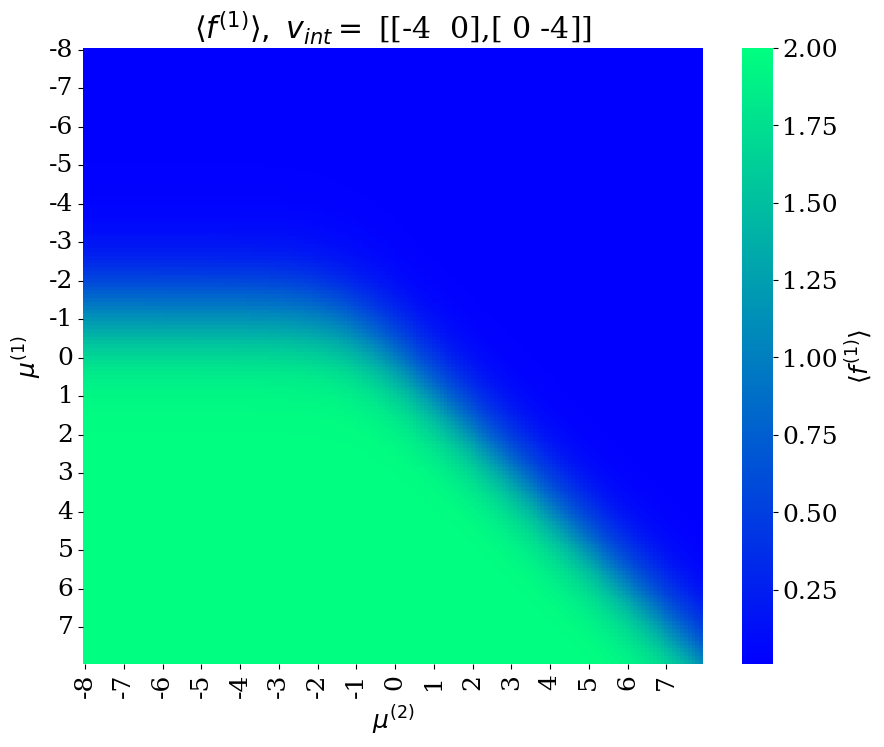

In [27]:
#density maps
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

f_gam_soln_arr = density_maps

# #protein 1
ax = sns.heatmap(f_gam_soln_arr[0], linewidth=0., cmap = "winter", xticklabels=mu2_array, yticklabels=mu1_array, cbar_kws={'label':  r'$ \langle f^{(1)} \rangle $'})
# ax.set_xticks(ax.get_xticks()[::2])
# ax.set_xticklabels(mu2_array[::2].astype(np.int64))
# ax.set_yticks(ax.get_yticks()[::2])
# ax.set_yticklabels(mu1_array[::2].astype(np.int64))

ax.set_xticks(ax.get_xticks()[::spacing])
ax.set_xticklabels(np.round(mu2_array[::spacing],0).astype(np.int64))
ax.set_yticks(ax.get_yticks()[::spacing])
ax.set_yticklabels(np.round(mu2_array[::spacing],0).astype(np.int64))

# ax.axhline(y=60, linewidth=4, color="white", linestyle = "--")
# ax.axhline(y=37, linewidth=4, color="white", linestyle = "--")

plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")
# plt.title(r"$ \langle f^{(1)} \rangle $" +  ", $e_B^{(1)} = $" + \
#           str(e_m[0]) + ", $e_B^{(2)} = $" + str(e_m[1]) \
#           +  " $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]")
plt.title(r"$ \langle f^{(1)} \rangle, $"  \
          +  " $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]")

plt.show()


In [29]:
f_gam_soln_arr[0][32,32]

0.019999999999999997

<Figure size 640x480 with 0 Axes>

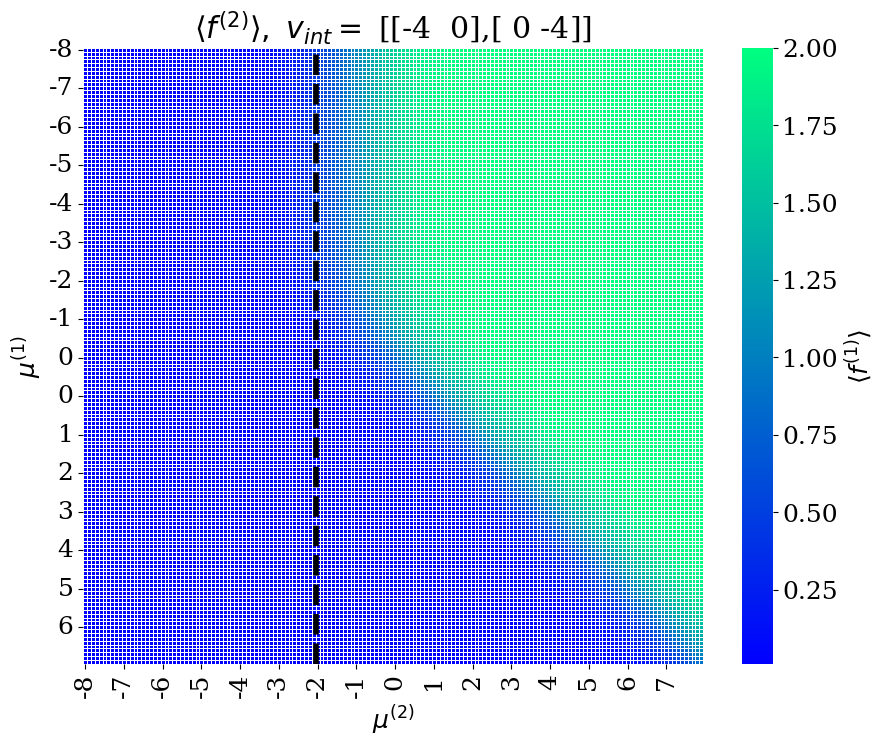

In [31]:
#density maps
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

f_gam_soln_arr = density_maps

# #protein 1
ax = sns.heatmap(f_gam_soln_arr[1], linewidth=0.5, cmap = "winter", xticklabels=mu2_array, yticklabels=mu1_array, cbar_kws={'label':  r'$ \langle f^{(1)} \rangle $'})
# ax.set_xticks(ax.get_xticks()[::2])
# ax.set_xticklabels(mu2_array[::2].astype(np.int64))
# ax.set_yticks(ax.get_yticks()[::2])
# ax.set_yticklabels(mu1_array[::2].astype(np.int64))

ax.set_xticks(ax.get_xticks()[::spacing])
ax.set_xticklabels(np.round(mu2_array[::spacing],0).astype(np.int64))
ax.set_yticks(ax.get_yticks()[::spacing])
ax.set_yticklabels(mu1_array[::spacing].astype(np.int64))

ax.axvline(x=60, linewidth=4, color="black", linestyle = "--")

plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")
# plt.title(r"$ \langle f^{(1)} \rangle $" +  ", $e_B^{(1)} = $" + \
#           str(e_m[0]) + ", $e_B^{(2)} = $" + str(e_m[1]) \
#           +  " $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]")
plt.title(r"$ \langle f^{(2)} \rangle, $"  \
          +  " $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]")

plt.show()


In [32]:
"$, \rho_c = %s, $" % np.round(rho_c,6) + " $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]"

'$, \rho_c = 5.7e-05, $ $v_{int} = $ [[-4  0],[ 0 -4]]'

(-4.0, 4.0)

<Figure size 640x480 with 0 Axes>

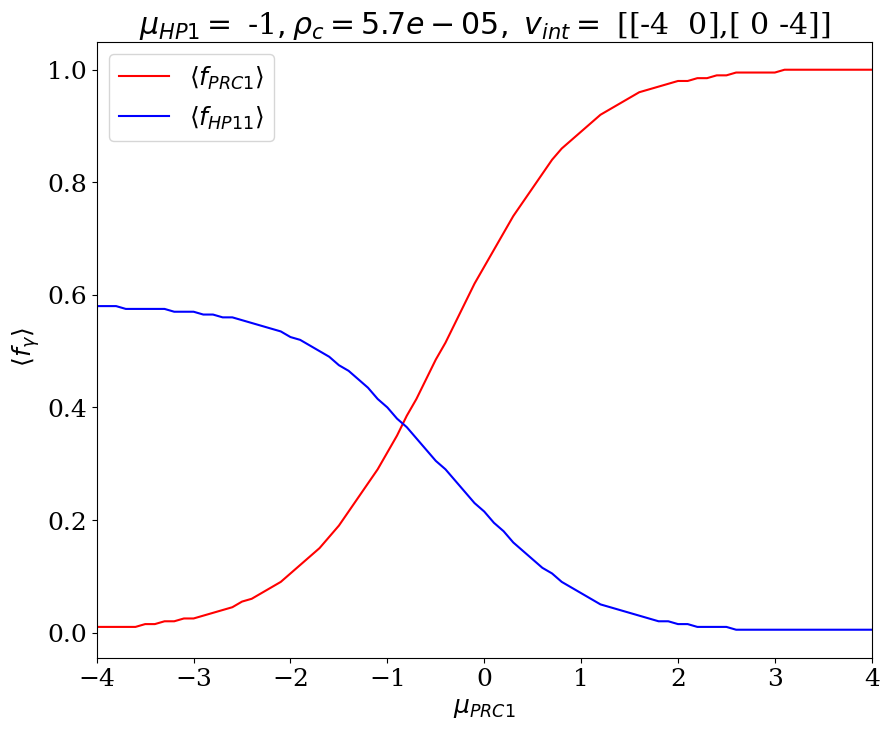

In [33]:
# 1D solution plotting
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

f_gam = density_maps

mu1_val = -1
# # f_bar (single solns ONLY): 
# plt.plot(mu1_array, f_gam_soln_arr[0][:,9], label = r"$ \langle f_{\gamma}^{(1)} \rangle $", color = "blue")
plt.plot(mu2_array, f_gam[1][np.where(np.round(mu1_array,2) == mu1_val )[0][0],:] / 2, label = r"$ \langle f_{PRC1} \rangle $", color = "red", linestyle = "-")
plt.plot(mu1_array, f_gam[0][np.where(np.round(mu1_array,2) == mu1_val )[0][0],:] / 2, label = r"$ \langle f_{HP11} \rangle $", color = "blue", linestyle = "-")


# s_bind:
# plt.plot(mu1_array, s_bind_soln_arr[0][:,0], label = r"$ \langle s_{bind}^{(\gamma_1, \sigma = 0)} \rangle $",)
# plt.plot(mu1_array, s_bind_soln_arr[1][:,0], label = r"$ \langle s_{bind}^{(\gamma_1, \sigma = 1)} \rangle $",)
# plt.plot(mu1_array, s_bind_soln_arr[2][:,0], label = r"$ \langle s_{bind}^{(\gamma_1, \sigma = 2)} \rangle $",)

# plt.plot(mu2_array, s_bind_soln_arr[3][0,:], label = r"$ \langle s_{bind}^{(\gamma_2, \sigma = 0)} \rangle $",)
# plt.plot(mu2_array, s_bind_soln_arr[4][0,:], label = r"$ \langle s_{bind}^{(\gamma_2, \sigma = 1)} \rangle $",)
# plt.plot(mu2_array, s_bind_soln_arr[5][0,:], label = r"$ \langle s_{bind}^{(\gamma_2, \sigma = 2)} \rangle $",)


# LANGMUIR. Assumptions only valid when v_int = 0, and for sigma =0 or 2 (all sites identical)
# K = np.exp(-e_m[0])
# plt.plot(mu1_array, 2*K*np.exp(mu1_array) / (1+ K*np.exp(mu1_array)), label = "langmuir", linestyle = ":", color = "black")

# K = np.exp(-0)  # sigma = 0 - all binding energies are 0
# plt.plot(mu1_array, 2*K*np.exp(mu1_array) / (1+ K*np.exp(mu1_array)), label = "langmuir, e_b = 0", linestyle = "-.", color = "black")


plt.ylabel(r" $ \langle f_{\gamma} \rangle $")
plt.xlabel("$\mu_{PRC1} $")
plt.title(r"$ \mu_{HP1} = $ " + str(np.round(mu1_val, 2)) + r"$,  \rho_c = %s, $" % np.round(rho_c,6) + " $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]")
# plt.hlines(1, -10, 10, color = "black", alpha = 0.3)
# # plt.vlines(-.75, 0,2, color = "black", alpha = 0.3, label = "$\mu = -0.75$")
# plt.vlines(-0, 0,2, color = "black", alpha = 0.3, label = "$\mu = 0$")
plt.legend()
plt.xlim(-4,4)



In [37]:
np.round(mu1_array[::spacing],0).astype(int)

array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7])

In [39]:
rho_s

33.44444444444445

In [41]:
# # rho_s estimation:

# water_dens = 1000 #kg/m^3
# water_molmas = 18 #g/mol
# avo = 6.02e23 # particles/mol


# rho_s = avo * (1/water_molmas) * (  1000  *(1000/1) * (1/1e9)**3 )#  num / nm^3
# #             part/g                    
# rho_s

In [44]:
rho_c

5.7295779513082324e-05

In [46]:
Vol_int

113.09733552923254

In [37]:
s2_mats[1][9][9].copy()

array([[1.38524439e-05, 0.00000000e+00,            nan,            nan],
       [0.00000000e+00, 3.34444444e+01, 0.00000000e+00, 0.00000000e+00],
       [           nan, 0.00000000e+00,            nan,            nan],
       [           nan, 0.00000000e+00,            nan,            nan]])

In [43]:
s_bind_A

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [21]:
# %%time
# stab anal NUMBER DENSITY THEORY

# poly solv
# chi = 0.00083
# chi = 3/N
# chi = 2/N

# full soln
# chi = 0.00005828
chi = -1.0


min_eigval_arr = np.zeros((len(mu1_array[:]), len(mu2_array[:]), len(k_vec)))
# min_eigval_arr_melt = np.zeros((len(mu1_array[:]), len(mu2_array[:]), len(k_vec)))
# min_eigval_arr_ps = np.zeros((len(mu1_array[:]), len(mu2_array[:]), len(k_vec)))

min_eigval_arr_ps = np.zeros((len(mu1_array[:]), len(mu2_array[:]), len(k_vec)))


S2_det_arr = np.zeros((len(mu1_array[:]), len(mu2_array[:]), len(k_vec[:])))

S2_cond_arr_soln_2 = np.zeros((len(mu1_array[:]), len(mu2_array[:]), len(k_vec[:])))
# S2_cond_arr_soln_1 = np.zeros((len(mu1_array[:]), len(mu2_array[:]), len(k_vec[:])))
# S2_cond_arr_melt_2 = np.zeros((len(mu1_array[:]), len(mu2_array[:]), len(k_vec[:])))

max_cond_arr_allk = np.zeros((len(mu1_array[:]), len(mu2_array[:])))

min_eigval_arr_allk_DENS = np.zeros((len(mu1_array[:]), len(mu2_array[:])))
min_eigval_arr_allk_ps = np.zeros((len(mu1_array[:]), len(mu2_array[:])))
# min_eigval_arr_allk_DENS_melt = np.zeros((len(mu1_array[:]), len(mu2_array[:])))

# min_eigvec_arr = np.zeros((len(mu1_array[:]), len(mu2_array[:]), len(k_vec)), dtype = object)
# min_eigvec_arr_allk_DENS = np.zeros((len(mu1_array[:]), len(mu2_array[:])), dtype = object)

min_eigvec_arr = np.zeros((len(mu1_array[:]), len(mu2_array[:]), len(k_vec), 3))
min_eigvec_arr_allk_DENS = np.zeros((len(mu1_array[:]), len(mu2_array[:]), 3))

k_star_arr_DENS= np.zeros((len(mu1_array[:]), len(mu2_array[:]))) 

# A = 1/(b) # nm^2 cross sectional area
# vol_nuc = A*(b) # volume of nucleosome

# vol_solv = 1#N #1#10000000**3# (4e-10)**3

# s2_mats = s2_mat_shlk_dens
for i, mu1 in enumerate(mu1_array[:]):
    for j, mu2 in enumerate(mu2_array[:]):
#         if mu1 == mu2:
#             continue
        mu = [mu1, mu2]
#         print("mu: ", mu)

        for ik, k in enumerate(k_vec):
#             S2_mat = 1/N**2 * np.array([[cc[0], 0, cg1[0], cg2[0]],\
#                             [0, ss*N**2, 0, 0], \
#                             [cg1[0], 0, g1g1[0], g1g2[0]],\
#                             [cg2[0], 0, g2g1[0], g2g2[0]]])
        
#             S2_mat =  s2_mats[i][j][ik] # ORIGINAL

            S2_mat =  s2_mats[i][j][ik].copy()
#             print(S2_mat)
            M = len(marks_1)
    
#             # ORIGINAL
#             S2_mat *= M              #N*vol_nuc
#             S2_mat[1][1] /= M        #(N*vol_nuc)
            
            # EDIT. in code sfs defined as S =N**2 * 1/N**2 ~integral~. 
            # need to divide by vol. BUt already mulitplied by rho.
            # so to maintain equality, need to divide by M 
#             S2_mat /= M
#             S2_mat[1][1] *= M
            
            
            # EDIT  2. goal is 1/V * (N**2 * 1/N**2) = rho_c / M
            # in code sfs defined as S =N**2 * 1/N**2 ~integral~. 
            # then in sf_mats multiply facotr of rho_c / N^2. overall prefacotr is rho_c/N^2
            # To get to goal, must multiply by N_m^2 * M
            S2_mat *= (N_m**2 * M)
            S2_mat[1][1] /= (N_m**2 * M)
            print(S2_mat)
            # TESTING DIF MAGNITUDES OF RHO_S
#             rho_s_test = 1e-5#33#1e5
#             S2_mat[1][1] = rho_s_test 
            
#             if phi_c >= 0.999:
#                 raise Exception("melt!")
                
            
            # FULL SOLUTION 2 reader proteins
            S2_det = np.linalg.det(S2_mat)
#             S2_det_arr[i][j][ik] = S2_det
            # print("S2 det: ", S2_det)
            # print("---------------------------------------")
            S2_cond = np.linalg.cond(S2_mat)
            S2_cond_arr_soln_2[i][j][ik] = S2_cond
            
            
            if S2_det != 0:# and S2_cond < 1e10:
                S2_inv = np.linalg.inv(S2_mat)

#                 G2 = (1/N)* np.array([[S2_inv[0,0] - 2*chi*N + S2_inv[1,1], S2_inv[0,2], S2_inv[0, 3]],\
#                    [S2_inv[2,0], S2_inv[2,2] + N*v_int[0,0], S2_inv[2,3] + N*v_int[0,1]],\
#                    [S2_inv[3,0], S2_inv[3,2] + N*v_int[1,0], S2_inv[3,3] + N*v_int[1,1]]])  # ORIGINAL (no int vol)

                #CORRECT (using interaction volume term)
                G2 = np.array([[S2_inv[0,0] - 2*chi + S2_inv[1,1], S2_inv[0,2], S2_inv[0, 3]],\
                   [S2_inv[2,0], S2_inv[2,2] + v_int[0,0]*Vol_int, S2_inv[2,3] + v_int[0,1]*Vol_int],\
                   [S2_inv[3,0], S2_inv[3,2] + v_int[1,0]*Vol_int, S2_inv[3,3] + v_int[1,1]*Vol_int]])

#                 # testing chi_12
#                 chi_12 = 100#v_int[1,0] - ( (v_int[0,0] + v_int[1,1])/2 )
#                 G2 = np.array([[S2_inv[0,0] - 2*chi + S2_inv[1,1], S2_inv[0,2], S2_inv[0, 3]],\
#                    [S2_inv[2,0], S2_inv[2,2] + 0*Vol_int, S2_inv[2,3] + chi_12*Vol_int],\
#                    [S2_inv[3,0], S2_inv[3,2] + chi_12*Vol_int, S2_inv[3,3] + 0*Vol_int]])
            
# #                 testing v_c
#                 G2 = np.array([[S2_inv[0,0] - 2*chi + S2_inv[1,1], S2_inv[0,2], S2_inv[0, 3]],\
#                    [S2_inv[2,0], S2_inv[2,2] + -2*Vol_int, S2_inv[2,3] + 2*Vol_int],\
#                    [S2_inv[3,0], S2_inv[3,2] + 2*Vol_int, S2_inv[3,3] + -2*Vol_int]])
                
                val, vec = np.linalg.eigh(G2)
                vec = vec.T
#                 print(vec)
#                 print(vec.T)
#                 print(val)
                min_val = np.min(val)            
                min_eigval_arr[i][j][ik] = min_val
                min_eigvec_arr[i][j][ik] = vec[np.where(val == min_val)]

            # POLY/SOLV only
            S2_mat = np.array([[S2_mat[0,0], 0], [0, S2_mat[1,1]]])

#             if phi_c >= 0.999:
#                 raise Exception("melt!")
            S2_det = np.linalg.det(S2_mat)           
            
            if S2_det != 0:# and S2_cond < 1e10:
                S2_inv = np.linalg.inv(S2_mat)

#                 G2 = (1/N)* np.array([S2_inv[0,0] - 2*chi*N + S2_inv[1,1]]) # original
                
                G2 = np.array([S2_inv[0,0] - 2*chi + S2_inv[1,1]])

                val = G2[0]
#                 min_val = np.min(val)            
                min_eigval_arr_ps[i][j][ik] = val


        # all-k analysis
        min_vals = min_eigval_arr[i][j][:][np.nonzero(min_eigval_arr[i][j][:])] # min eigvals at mu1,mu2 for each k
        
        min_vecs = min_eigvec_arr[i][j][:][np.nonzero(min_eigval_arr[i][j][:])]
        if len(min_vals) != 0:
            minval_allk = np.min(min_vals) # minimum eigenvalue at mu1,mu2 across all ks
#             print(minval_allk)
            min_eigval_arr_allk_DENS[i][j] = minval_allk
            
            min_eigvec_arr_allk_DENS[i][j] = min_vecs[np.where(min_vals==minval_allk)]#[0][0] #double zero if saving as objects
            
            k_star = k_vec[np.where(min_vals==minval_allk)] # corresponding k 
#             print(k_star)
            k_star_arr_DENS[i][j] = k_star

            
        min_vals_ps = min_eigval_arr_ps[i][j][:][np.nonzero(min_eigval_arr_ps[i][j][:])] # min eigvals at mu1,mu2 for each k
#         if len(min_vals_ps) != 0:
#             minval_allk = np.min(min_vals_ps) # minimum eigenvalue at mu1,mu2 across all ks
        min_eigval_arr_allk_ps[i][j] = np.min(min_vals_ps)
            
#         min_vals_melt = min_eigval_arr_melt[i][j][:] # min eigvals at mu1,mu2 for each k
#         minval_allk_melt = np.min(min_vals_melt) # minimum eigenvalue at mu1,mu2 across all ks
#         min_eigval_arr_allk_DENS_melt[i][j] = minval_allk_melt

        cond_nums = S2_cond_arr_soln_2[i][j][:]
        max_cond_allk = np.max(cond_nums)
        max_cond_arr_allk[i][j] = max_cond_allk
        

# setting all non-decomposed/ separated systems to 0 
poly_fluc = min_eigvec_arr_allk_DENS[:,:,0]
poly_fluc[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = 0

prot1_fluc = min_eigvec_arr_allk_DENS[:,:,1]
prot1_fluc[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = 0

prot2_fluc = min_eigvec_arr_allk_DENS[:,:,2]
prot2_fluc[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = 0

[[22105.93902475     0.                    nan            nan]
 [    0.            33.44444444     0.             0.        ]
 [           nan     0.                    nan            nan]
 [           nan     0.                    nan            nan]]


LinAlgError: Eigenvalues did not converge

In [162]:
# chi_12

In [163]:
# RHO_S TESTING
# #density maps
# fig = plt.figure()
# plt.figure(figsize=(10,8))

# font = {'family' : 'serif',
#         'weight':'normal',
#         'size': 18}
# plt.rc('font', **font)

# # plt.scatter(mu1_array[np.where(multi_soln_mus == 1)[0]],mu2_array[np.where(multi_soln_mus == 1)[1]])
# # k_ind = 20
# ax = sns.heatmap(np.sign(min_eigval_arr_allk_DENS[:70, :70]), linewidth=0.1, cmap = "copper", xticklabels=mu2_array[:70], yticklabels=mu1_array[:70])
# # ax = sns.heatmap(np.sign(min_eigval_arr[0:3][0:3][k_ind]), linewidth=0.1, cmap = "winter", cbar_kws={'label':  r'$ \langle f^{(1)} \rangle $'})
# # protein 1
# # ax = sns.heatmap(f_gam_soln_arr[0], linewidth=0.5, cmap = "winter", xticklabels=mu2_array, yticklabels=mu1_array, cbar_kws={'label':  r'$ \langle f^{(1)} \rangle $'})
# ax.set_xticks(ax.get_xticks()[::spacing])
# ax.set_xticklabels(np.round(mu2_array[:70:spacing],0).astype(np.int64))
# ax.set_yticks(ax.get_yticks()[:70:spacing])
# ax.set_yticklabels(np.round(mu2_array[:70:spacing],0).astype(np.int64))


# # ax.axvline(x=52, linewidth=4, color="w", linestyle = "--")
# # ax.axhline(y=47, linewidth=4, color="w", linestyle = "--")

# ax.axvline(x=60, linewidth=4, color="white", linestyle = "--")
# ax.axhline(y=60, linewidth=4, color="white", linestyle = "--")

# plt.ylabel("$\mu^{(1)}$")
# plt.xlabel("$\mu^{(2)}$")
# plt.title(looping + r"$\rho_s = %s$, "% np.round(rho_s_test,10) + r"$ sign \ of \ \lambda_{min}, all \ k$" +  ", $\chi = $" + \
#           str(np.round(chi, 2)) \
#           +  ", $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]"+\
#           "\n")


# plt.show()


<Figure size 640x480 with 0 Axes>

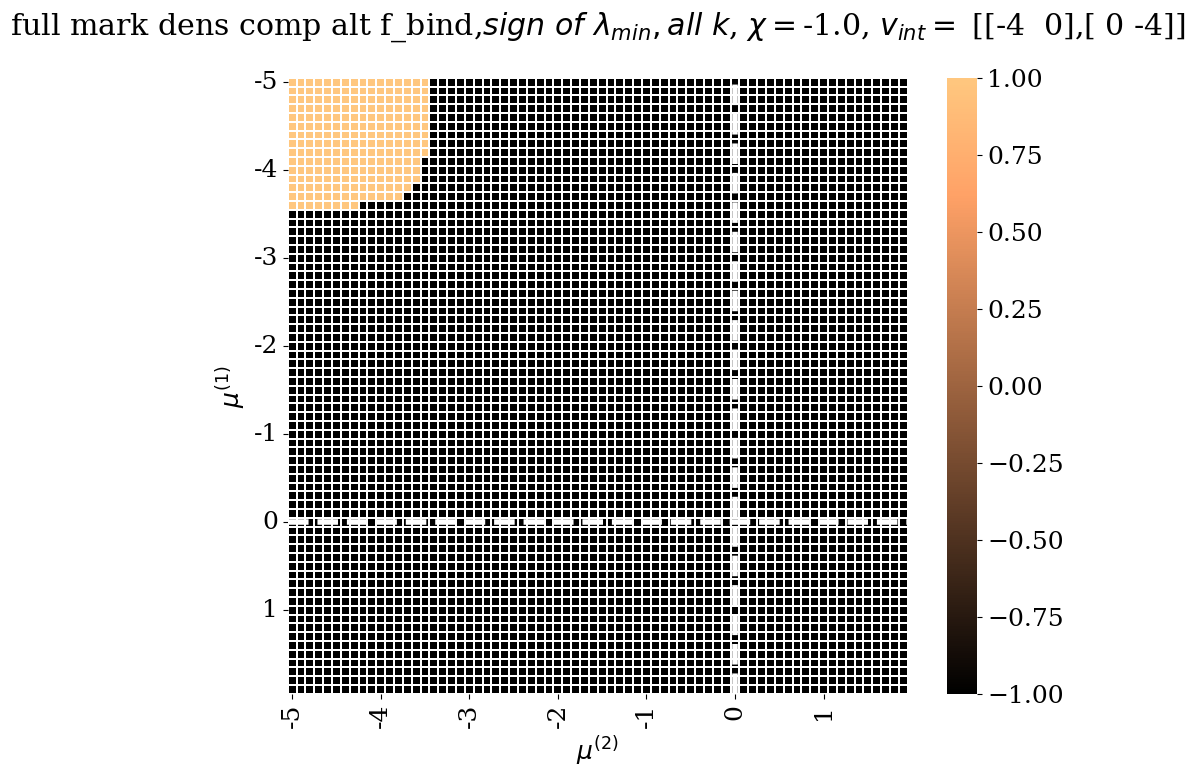

In [52]:
#density maps
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.scatter(mu1_array[np.where(multi_soln_mus == 1)[0]],mu2_array[np.where(multi_soln_mus == 1)[1]])
# k_ind = 20
min_ind = 30
max_ind = 100
ax = sns.heatmap(np.sign(min_eigval_arr_allk_DENS[min_ind:max_ind,min_ind:max_ind]), linewidth=0.1, cmap = "copper", xticklabels=mu2_array[min_ind:max_ind], yticklabels=mu1_array[min_ind:max_ind])
# ax = sns.heatmap(np.sign(min_eigval_arr[0:3][0:3][k_ind]), linewidth=0.1, cmap = "winter", cbar_kws={'label':  r'$ \langle f^{(1)} \rangle $'})
# protein 1
# ax = sns.heatmap(f_gam_soln_arr[0], linewidth=0.5, cmap = "winter", xticklabels=mu2_array, yticklabels=mu1_array, cbar_kws={'label':  r'$ \langle f^{(1)} \rangle $'})
ax.set_xticks(ax.get_xticks()[::spacing])
ax.set_xticklabels(np.round(mu2_array[min_ind:max_ind:spacing],0).astype(np.int64))
ax.set_yticks(ax.get_yticks()[::spacing])
ax.set_yticklabels(np.round(mu2_array[min_ind:max_ind:spacing],0).astype(np.int64))


# ax.axvline(x=52, linewidth=4, color="w", linestyle = "--")
# ax.axhline(y=47, linewidth=4, color="w", linestyle = "--")

ax.axvline(x=50.5, linewidth=4, color="white", linestyle = "--")
ax.axhline(y=50.5, linewidth=4, color="white", linestyle = "--")

# ax.axhline(y=24.5, linewidth=2, color="red", linestyle = "-") 
# ax.axvline(x=25.5, linewidth=2, color="red", linestyle = "-")

# ax.axhline(y=17.5, linewidth=2, color="blue", linestyle = "-") 
# ax.axvline(x=18.5, linewidth=2, color="blue", linestyle = "-")

plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")
v_int_orig = v_int.copy()
# v_int = [[-2,2],[2,-2]]

# plt.title("$\chi_{12} = %s,$ " % chi_12 + looping + r"$ sign \ of \ \lambda_{min}, all \ k$" +  ", $\chi = $" + \
#           str(np.round(chi, 2)) \
#           +  ", $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]"+\
#           "\n")

plt.title( looping + r"$ sign \ of \ \lambda_{min}, all \ k$" +  ", $\chi = $" + \
          str(np.round(chi, 2)) \
          +  ", $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]"+\
          "\n")
v_int = v_int_orig

plt.show()


In [173]:
v_cross = np.arange(0,4.1,0.2)
print(len(v_cross))
v_cross

21


array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ])

In [175]:
v_cross[20]

4.0

<Figure size 640x480 with 0 Axes>

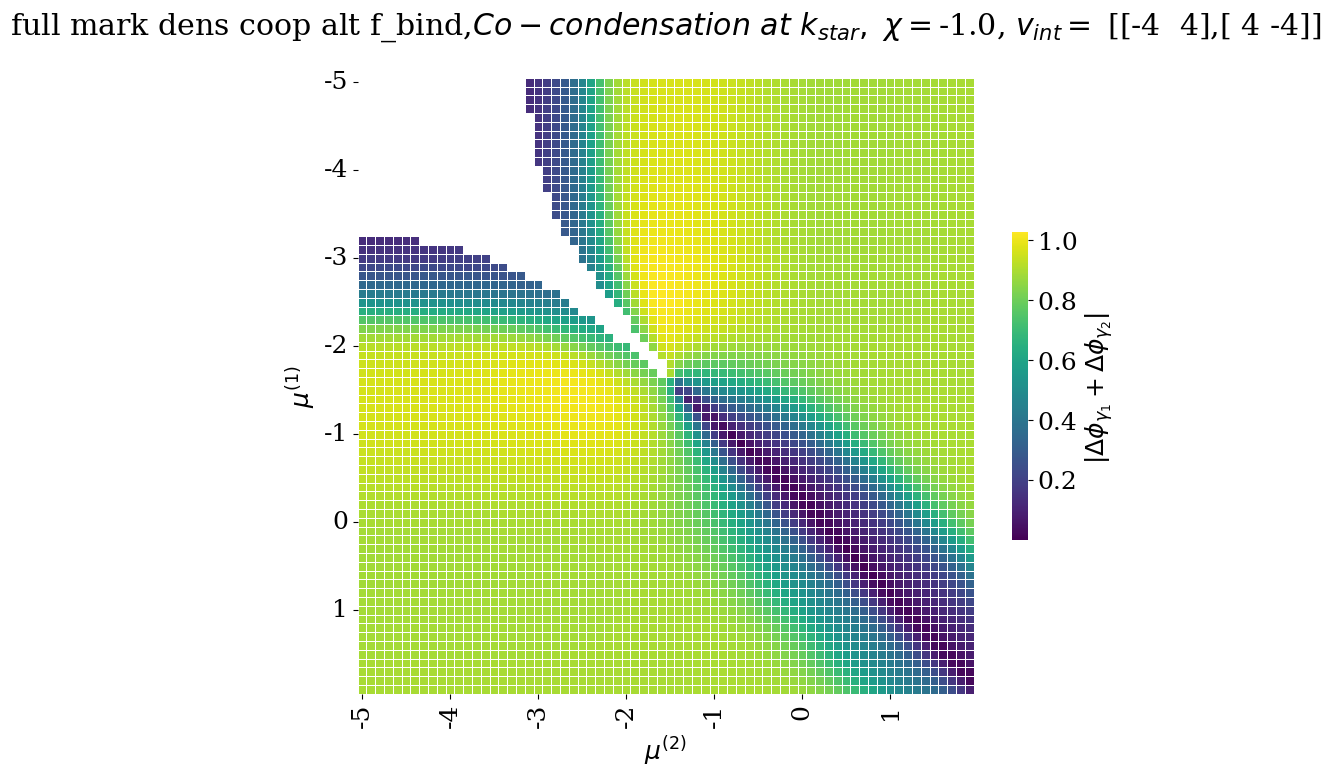

In [72]:
#density maps
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

min_ind = 30
max_ind = 100

abs_mat = np.abs(prot1_fluc + prot2_fluc)
binary_map = abs_mat.copy()
binary_map[binary_map > 1] = 2
binary_map[binary_map <= 1] = 0

abs_mat[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = np.nan

ax = sns.heatmap(abs_mat[min_ind:max_ind,min_ind:max_ind], square = True, linewidth=0.5, cmap = "viridis", xticklabels=mu2_array[min_ind:max_ind], yticklabels=mu1_array[min_ind:max_ind], cbar_kws={"shrink": 0.5, 'label':  r"$ |\Delta \phi_{\gamma_1} + \Delta \phi_{\gamma_2}|$ "})
#     ax = sns.heatmap(binary_map, linewidth=0.5, cmap = cmap, xticklabels=mu2_array, yticklabels=mu1_array)
# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks([0.5,1.5])
# colorbar.set_ticklabels([r"$ | \Delta \phi_{\gamma_1} $ + $ \Delta \phi_{\gamma_2} | \leq 1$", r"$ | \Delta \phi_{\gamma_1} $ + $ \Delta \phi_{\gamma_2} | > 1$"])

    
# plt.scatter(mu1_array[np.where(multi_soln_mus == 1)[0]],mu2_array[np.where(multi_soln_mus == 1)[1]])
# k_ind = 20
# ax = sns.heatmap(np.abs(prot2_fluc), linewidth=0.25, norm = LogNorm(), cmap = "Blues", xticklabels=mu2_array, yticklabels=mu1_array, cbar_kws={'label':  r"$ |\Delta \phi_{\gamma_2}|$ "})
# # ax = sns.heatmap(np.sign(min_eigval_arr[0:3][0:3][k_ind]), linewidth=0.1, cmap = "winter", cbar_kws={'label':  r'$ \langle f^{(1)} \rangle $'})
# # protein 1
# # ax = sns.heatmap(f_gam_soln_arr[0], linewidth=0.5, cmap = "winter", xticklabels=mu2_array, yticklabels=mu1_array, cbar_kws={'label':  r'$ \langle f^{(1)} \rangle $'})
ax.set_xticks(ax.get_xticks()[::spacing])
ax.set_xticklabels(np.round(mu2_array[min_ind:max_ind:spacing],0).astype(np.int64))
ax.set_yticks(ax.get_yticks()[::spacing])
ax.set_yticklabels(np.round(mu2_array[min_ind:max_ind:spacing],0).astype(np.int64))



# ax.axvline(x=50, linewidth=4, color="black", linestyle = "--")
# ax.axvline(x=47, linewidth=4, color="black", linestyle = "--")
# ax.axhline(y=50, linewidth=4, color="black", linestyle = "--")
# ax.scatter(50,40)
# ax.scatter(40,30)
# plt.plot(60.5,60.5,'ro') 
# plt.plot(60.5,50.5,'go') 

plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")
plt.title(looping + r"$Co-condensation \ at \ k_{star}, $" +  " $\chi = $" + \
          str(np.round(chi, 2)) \
          +  ", $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]"+\
          "\n")


plt.show()

<Figure size 640x480 with 0 Axes>

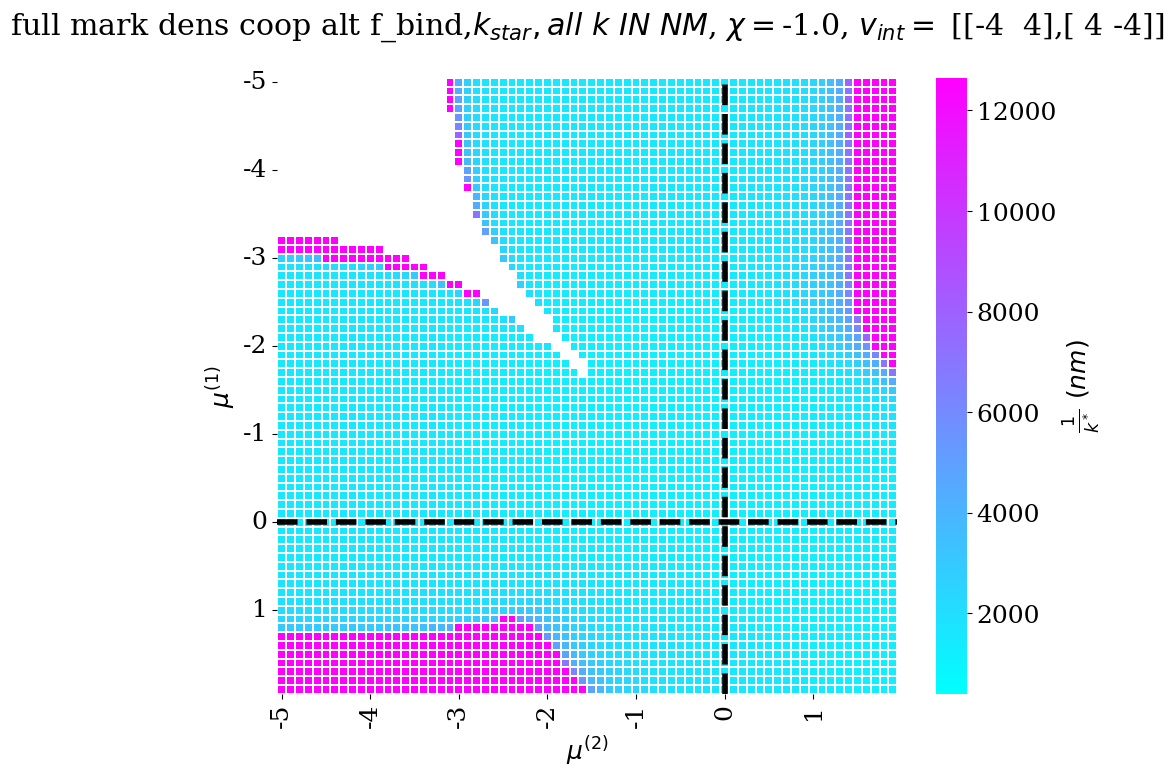

In [73]:
# Explanation: first choose distances. These distances must be in the same units at the persisitnece length due  to exp(xm) term
# in sf calculation. Doesnt matter if used b to scale the lengths used- they are still in nanometers
# then invert these distances to get magnitudes of wavevectors
# then find k star, and invert it to get the critical lengthscale in units of nm


fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)


min_ind = 30
max_ind = 100

# plt.scatter(mu1_array[np.where(multi_soln_mus == 1)[0]],mu2_array[np.where(multi_soln_mus == 1)[1]])
# k_ind = 20
#     poly_fluc = min_eigvec_arr_allk[:,:,0]
#     poly_fluc[np.where(np.sign(min_eigval_arr_allk) == 1) ] = 0

#     prot1_fluc = min_eigvec_arr_allk[:,:,1]
#     prot1_fluc[np.where(np.sign(min_eigval_arr_allk) == 1) ] = 0

#     prot2_fluc = min_eigvec_arr_allk[:,:,2]
#     prot2_fluc[np.where(np.sign(min_eigval_arr_allk) == 1) ] = 0
    
k_star_arr_DENS[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = np.nan
# ax = sns.heatmap(1/(k_star_arr*b), linewidth=0.25, cmap = "cool", xticklabels=mu2_array, yticklabels=mu1_array, cbar_kws={'label':  r"$ \frac{1}{k^*} \ (nm)$"})
ax = sns.heatmap((1/(k_star_arr_DENS[min_ind:max_ind,min_ind:max_ind])), linewidth=0.25, cmap = "cool", xticklabels=mu2_array[min_ind:max_ind], yticklabels=mu1_array[min_ind:max_ind],\
                 cbar_kws={'label':  r"$ \frac{1}{k^*} \ (nm)$"},\
                    vmin=1/(k_vec[-1]), vmax=1/(k_vec[0]))
# ax = sns.heatmap(np.sign(min_eigval_arr[0:3][0:3][k_ind]), linewidth=0.1, cmap = "winter", cbar_kws={'label':  r'$ \langle f^{(1)} \rangle $'})
# protein 1
# ax = sns.heatmap(f_gam_soln_arr[0], linewidth=0.5, cmap = "winter", xticklabels=mu2_array, yticklabels=mu1_array, cbar_kws={'label':  r'$ \langle f^{(1)} \rangle $'})
ax.set_xticks(ax.get_xticks()[::spacing])
ax.set_xticklabels(np.round(mu2_array[min_ind:max_ind:spacing],0).astype(np.int64))
ax.set_yticks(ax.get_yticks()[::spacing])
ax.set_yticklabels(np.round(mu2_array[min_ind:max_ind:spacing],0).astype(np.int64))


# ax.axvline(x=52, linewidth=4, color="black", linestyle = "--")
# ax.axhline(y=47, linewidth=4, color="black", linestyle = "--")

ax.axvline(x=50.5, linewidth=4, color="black", linestyle = "--")
ax.axhline(y=50.5, linewidth=4, color="black", linestyle = "--")

# plt.plot(35.75,10.5,'ro') 
# plt.plot(27.3,10.5,'go') 

plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")
plt.title(looping + r"$ k_{star}, all \ k \ IN \ NM$" +  ", $\chi = $" + \
          str(np.round(chi, 2)) \
          +  ", $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]" +\
          "\n")


plt.show()


<Figure size 640x480 with 0 Axes>

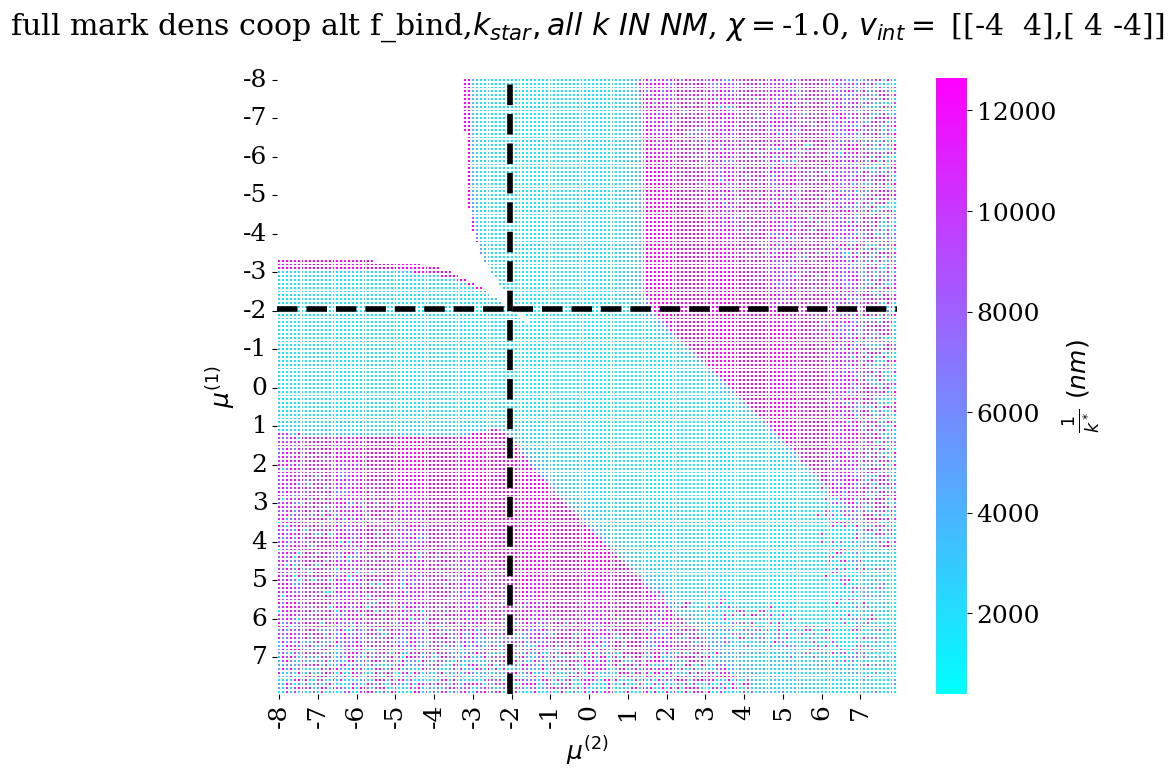

In [74]:
# Explanation: first choose distances. These distances must be in the same units at the persisitnece length due  to exp(xm) term
# in sf calculation. Doesnt matter if used b to scale the lengths used- they are still in nanometers
# then invert these distances to get magnitudes of wavevectors
# then find k star, and invert it to get the critical lengthscale in units of nm


fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.scatter(mu1_array[np.where(multi_soln_mus == 1)[0]],mu2_array[np.where(multi_soln_mus == 1)[1]])
# k_ind = 20
#     poly_fluc = min_eigvec_arr_allk[:,:,0]
#     poly_fluc[np.where(np.sign(min_eigval_arr_allk) == 1) ] = 0

#     prot1_fluc = min_eigvec_arr_allk[:,:,1]
#     prot1_fluc[np.where(np.sign(min_eigval_arr_allk) == 1) ] = 0

#     prot2_fluc = min_eigvec_arr_allk[:,:,2]
#     prot2_fluc[np.where(np.sign(min_eigval_arr_allk) == 1) ] = 0
    
k_star_arr_DENS[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = np.nan
# ax = sns.heatmap(1/(k_star_arr*b), linewidth=0.25, cmap = "cool", xticklabels=mu2_array, yticklabels=mu1_array, cbar_kws={'label':  r"$ \frac{1}{k^*} \ (nm)$"})
ax = sns.heatmap((1/(k_star_arr_DENS)), linewidth=0.25, cmap = "cool", xticklabels=mu2_array, yticklabels=mu1_array,\
                 cbar_kws={'label':  r"$ \frac{1}{k^*} \ (nm)$"},\
                    vmin=1/(k_vec[-1]), vmax=1/(k_vec[0]))
# ax = sns.heatmap(np.sign(min_eigval_arr[0:3][0:3][k_ind]), linewidth=0.1, cmap = "winter", cbar_kws={'label':  r'$ \langle f^{(1)} \rangle $'})
# protein 1
# ax = sns.heatmap(f_gam_soln_arr[0], linewidth=0.5, cmap = "winter", xticklabels=mu2_array, yticklabels=mu1_array, cbar_kws={'label':  r'$ \langle f^{(1)} \rangle $'})
ax.set_xticks(ax.get_xticks()[::spacing])
ax.set_xticklabels(np.round(mu2_array[::spacing],0).astype(np.int64))
ax.set_yticks(ax.get_yticks()[::spacing])
ax.set_yticklabels(np.round(mu2_array[::spacing],0).astype(np.int64))


# ax.axvline(x=52, linewidth=4, color="black", linestyle = "--")
# ax.axhline(y=47, linewidth=4, color="black", linestyle = "--")

ax.axvline(x=60, linewidth=4, color="black", linestyle = "--")
ax.axhline(y=60, linewidth=4, color="black", linestyle = "--")

# plt.plot(35.75,10.5,'ro') 
# plt.plot(27.3,10.5,'go') 

plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")
plt.title(looping + r"$ k_{star}, all \ k \ IN \ NM$" +  ", $\chi = $" + \
          str(np.round(chi, 2)) \
          +  ", $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]" +\
          "\n")


plt.show()
